## Figure 2

### Observed Hi-C matrices and insulation scores for S. hermaphroditum, P. pacificus, C. becei, C. elegans, C. remanei, O. tipulae, and O. onirici. 1 MB window, X chromosome and chromosome I.

Import packages

In [1]:
# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cooler
import bioframe

import cooltools
import cooltools.expected
from cooltools import snipping

import cooltools.lib.plotting
# Set up parallelization
import multiprocess

from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
from scipy import interpolate
from mpl_toolkits.axes_grid import make_axes_locatable
import pyBigWig
import csv

from cooltools.lib.numutils import adaptive_coarsegrain, interp_nan

# Import python package for working with cooler files and tools for analysis
from cooltools.insulation import calculate_insulation_score, find_boundaries

# check the version (0.4.0)
cooltools.__version__ 

/state/partition1/job-436604/ipykernel_1537017/1107802867.py:21: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid import make_axes_locatable


'0.4.0'

Load cool files

In [2]:
# load cool file
bin = str(5000)
file_she = str("She_PRJNA982879")
file_cbe = str("QG2082_caenorhabditis-becei-QG2082")
file_cre = str("Cre_PRJNA577507")
file_oon = str("Oon_PRJEB51305")

sheclr = cooler.Cooler("".join(["/home/aa7013/hic-to-cool/",file_she,"/",file_she,"_30_",bin,"_raw.cool"]))
ppaclr = cooler.Cooler("/home/aa7013/hic-to-cool/PS312_JK88_JK122_PRJNA12644-WBPS16-RS/PS312_JK88_JK122_PRJNA12644-WBPS16-RS_30_5000_raw.cool")
cbeclr = cooler.Cooler("".join(["/home/aa7013/hic-to-cool/",file_cbe,"/",file_cbe,"_30_",bin,"_raw.cool"]))
celclr = cooler.Cooler("/home/aa7013/hic-to-cool/N2_JK15_JK89_JK90_CE10/N2_JK15_JK89_JK90_CE10_30_5000_raw.cool")
creclr = cooler.Cooler("".join(["/home/aa7013/hic-to-cool/",file_cre,"/",file_cre,"_30_",bin,"_raw.cool"]))
oticlr = cooler.Cooler("/home/aa7013/hic-to-cool/CEW1_AA68_AA69/CEW1_AA68_AA69_30_5000_raw.cool")
oonclr = cooler.Cooler("".join(["/home/aa7013/hic-to-cool/",file_oon,"/",file_oon,"_30_",bin,"_raw.cool"]))

Calculate insulation scores

In [3]:
windows = [50000,100000,150000,200000] # resolution of your cool file is step size, this is bin size
sheins = calculate_insulation_score(sheclr, windows, verbose=True)
ppains = calculate_insulation_score(ppaclr, windows, verbose=True)
cbeins = calculate_insulation_score(cbeclr, windows, verbose=True)
celins = calculate_insulation_score(celclr, windows, verbose=True)
creins = calculate_insulation_score(creclr, windows, verbose=True)
otiins = calculate_insulation_score(oticlr, windows, verbose=True)
oonins = calculate_insulation_score(oonclr, windows, verbose=True)

INFO:root:Processing SHERM_X
INFO:root:Processing SHERM_N
INFO:root:Processing SHERM_I
INFO:root:Processing SHERM_V
INFO:root:Processing SHERM_III
INFO:root:Processing SHERM_2022.07.24.06
INFO:root:Processing SHERM_2022.07.24.07
INFO:root:Processing SHERM_2022.07.24.09
INFO:root:Processing SHERM_2022.07.24.11
INFO:root:Processing SHERM_2022.07.24.12
INFO:root:Processing SHERM_2022.07.24.13
INFO:root:Processing SHERM_2022.07.24.15
INFO:root:Processing SHERM_2022.07.24.16
INFO:root:Processing SHERM_2022.07.24.17
INFO:root:Processing SHERM_2022.07.24.18
INFO:root:Processing SHERM_2022.07.24.19
INFO:root:Processing SHERM_2022.07.24.20
INFO:root:Processing SHERM_2022.07.24.21
INFO:root:Processing SHERM_2022.07.24.22
INFO:root:Processing SHERM_2022.07.24.23
INFO:root:Processing SHERM_2022.07.24.25
INFO:root:Processing SHERM_2022.07.24.26
INFO:root:Processing SHERM_2022.07.24.27
INFO:root:Processing SHERM_2022.07.24.28
INFO:root:Processing SHERM_2022.07.24.29
INFO:root:Processing SHERM_2022.0

Define variables to smooth matrix and format ticks (these functions were taken from the cooltools documentation)

In [4]:
# home-brew wrapper around smoothing and filling of nan bins, see cooltools for details
def cgi_region(clr,region):
    cg = adaptive_coarsegrain(clr.matrix(balance=True).fetch(region),
                              clr.matrix(balance=False).fetch(region),
                              cutoff=3, max_levels=8)
    cgi = interp_nan(cg)
    return(cg) # chose to not interpolate...the way it fills in bins...makes it seem like stuff is there that isn't

# format x-axis, replace exponentials with intuitive abbreviations
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

Plot a ~1.4 MB region on the X chromosome as a matrix, and insulation score as a function of coordinate. 

/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext

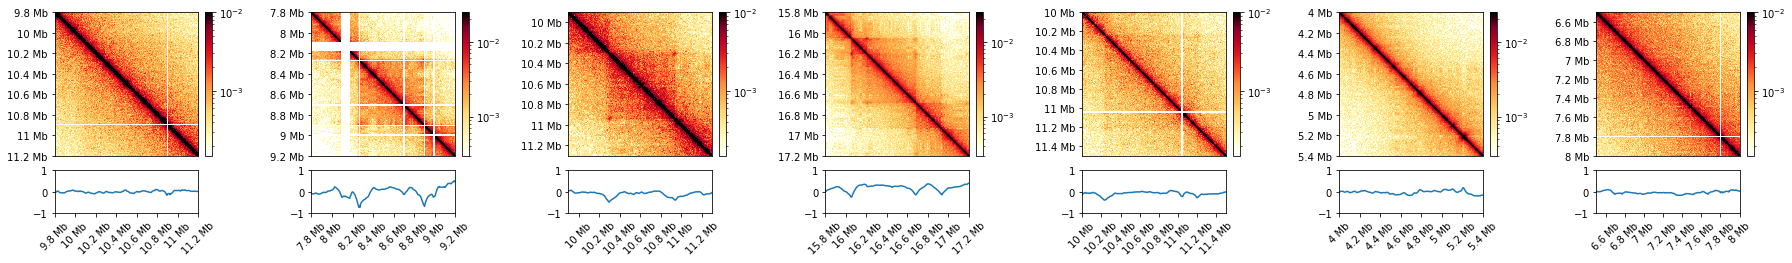

In [5]:
f, axs = plt.subplots(
    figsize=(25, 10),
    ncols=7,
    nrows=1
)

### matrix parameter
oon_norm = LogNorm(vmin=0.00015,vmax=0.01)
oti_norm = LogNorm(vmin=0.0003,vmax=0.025)
cre_norm = LogNorm(vmin=0.00015,vmax=0.01)
cel_norm = LogNorm(vmin=0.0003,vmax=0.025)
cbe_norm = LogNorm(vmin=0.00015,vmax=0.01)
ppa_norm = LogNorm(vmin=0.0003,vmax=0.025)
she_norm = LogNorm(vmin=0.00015,vmax=0.01)


### insulation parameter ###
ins_min,ins_max = [-1.0,1.0]


############################################## Oon ############################################
region = 'X:6,500,000-8,000,000'
start, end =6_500_000, 8_000_000
extents = (start, end, end, start)

ax = axs[6]
clr_region = cgi_region(oonclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=oon_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(oonins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Oti ############################################
region = 'X:4,000,000-5,400,000'
start, end =4_000_000, 5_400_000
extents = (start, end, end, start)

ax = axs[5]
clr_region = cgi_region(oticlr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=oti_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(otiins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Cre ############################################
region = 'X:10,000,000-11,500,000'
start, end =10_000_000, 11_500_000
extents = (start, end, end, start)

ax = axs[4]
clr_region = cgi_region(creclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=cre_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(creins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Cel ############################################
region = 'X:15,800,000-17,200,000'
start, end =15_800_000, 17_200_000
extents = (start, end, end, start)

ax = axs[3]
clr_region = cgi_region(celclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=cel_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(celins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Cbe ############################################
region = 'X:9,900,000-11,300,000'
start, end =9_900_000, 11_300_000
extents = (start, end, end, start)

ax = axs[2]
clr_region = cgi_region(cbeclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=cbe_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(cbeins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Ppa ############################################
region = 'X:7,800,000-9,200,000'
start, end =7_800_000, 9_200_000
extents = (start, end, end, start)

ax = axs[1]
clr_region = cgi_region(ppaclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=ppa_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(ppains, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## She ############################################
region = 'SHERM_X:9,800,000-11,200,000'
start, end =9_800_000, 11_200_000
extents = (start, end, end, start)

ax = axs[0]
clr_region = cgi_region(sheclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=she_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(sheins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

plt.tight_layout(w_pad=2)

#plt.savefig("chrX_zoom_all7_5kb_150kb_h.pdf", format='pdf', dpi=300)
#plt.savefig("chrX_zoom_all7_5kb_150kb_h.png", format='png', dpi=300)

Plot a 1.4 MB region on the chromosome I as a matrix, and insulation score as a function of coordinate. 

/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext3/miniconda3/lib/python3.9/site-packages/cooltools/lib/numutils.py:1355: RuntimeWarning: invalid value encountered in true_divide
  val_cur = ar_cur / armask_cur
/ext

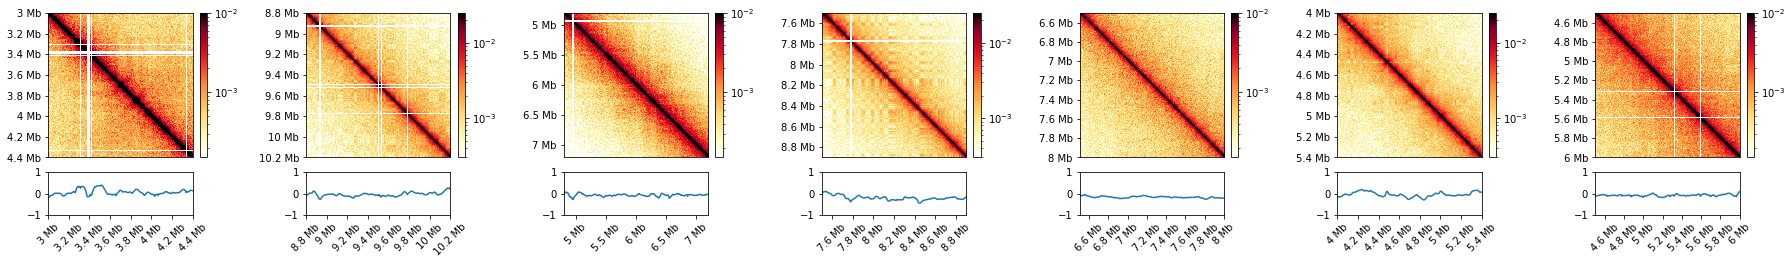

In [6]:
f, axs = plt.subplots(
    figsize=(25, 10),
    ncols=7,
    nrows=1
)

### matrix parameter
oon_norm = LogNorm(vmin=0.00015,vmax=0.01)
oti_norm = LogNorm(vmin=0.0003,vmax=0.025)
cre_norm = LogNorm(vmin=0.00015,vmax=0.01)
cel_norm = LogNorm(vmin=0.0003,vmax=0.025)
cbe_norm = LogNorm(vmin=0.00015,vmax=0.01)
ppa_norm = LogNorm(vmin=0.0003,vmax=0.025)
she_norm = LogNorm(vmin=0.00015,vmax=0.01)

### insulation parameter ###
ins_min,ins_max = [-1.0,1.0]


############################################## Oon ############################################
region = 'I:4,500,000-6,000,000'
start, end =4_500_000, 6_000_000
extents = (start, end, end, start)

ax = axs[6]
clr_region = cgi_region(oonclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=oon_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(oonins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Oti ############################################
region = 'I:4,000,000-5,400,000'
start, end =4_000_000, 5_400_000
extents = (start, end, end, start)

ax = axs[5]
clr_region = cgi_region(oticlr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=oti_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(otiins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Cre ############################################
region = 'I:6,500,000-8,000,000'
start, end =6_500_000, 8_000_000
extents = (start, end, end, start)

ax = axs[4]
clr_region = cgi_region(creclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=cre_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(creins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Cel ############################################
region = 'I:7,500,000-8,900,000'
start, end =7_500_000, 8_900_000
extents = (start, end, end, start)

ax = axs[3]
clr_region = cgi_region(celclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=cel_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(celins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), # this is the mean coordinate (mean of start and end)
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Cbe ############################################
region = 'I:4,800,000-7,200,000'
start, end =4_800_000, 7_200_000
extents = (start, end, end, start)

ax = axs[2]
clr_region = cgi_region(cbeclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=cbe_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(cbeins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), # this is the mean coordinate (mean of start and end)
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## Ppa ############################################
region = 'I:8,800,000-10,200,000'
start, end =8_800_000, 10_200_000
extents = (start, end, end, start)

ax = axs[1]
clr_region = cgi_region(ppaclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=ppa_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(ppains, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

############################################## She ############################################
region = 'SHERM_I:3,000,000-4,400,000'
start, end =3_000_000, 4_400_000
extents = (start, end, end, start)

ax = axs[0]
clr_region = cgi_region(sheclr,region)
im = ax.matshow(
    clr_region,
    cmap='fall',
    norm=she_norm,
    extent=extents
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # color axis for color bar
plt.colorbar(im, cax=cax)

#### insulation ####
ax_ins = divider.append_axes("bottom", size="30%", pad=0.2, sharex=ax) # axis for insulation score
ins_region = bioframe.select(sheins, region)
ax_ins.plot(ins_region[['start', 'end']].mean(axis=1), 
            ins_region['log2_insulation_score_150000']) # where you input the window size you used

# force min/max values
ax_ins.set_ylim([ins_min,ins_max])

#### formatting ####
ax.xaxis.set_visible(False) # hide axis labels
ax_ins.xaxis.set_visible(True) # hide axis labels
format_ticks(ax,x=True,y=True,rotate=True) # format y-axis for matrix
plt.xticks(rotation=45)

plt.tight_layout(w_pad=2)

#plt.savefig("chrA_zoom_all7_5kb_150kb_h.pdf", format='pdf', dpi=300)
#plt.savefig("chrA_zoom_all7_5kb_150kb_h.png", format='png', dpi=300)